In [3]:
import warnings

warnings.filterwarnings("ignore")

from pathlib import Path
from IPython.display import Markdown


import torch
from torch import nn
from torch.nn import functional as nnf
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dvs
from dvs import plots
from dvs.utils.nodes_edges_utils import adapted_cell_type, original_cell_type
from dvs.plots.figsize_utils import figsize_from_n_items, figure_size_cm, fit_panel_size
from dvs.plots.plt_utils import (
    cm_to_inch,
    add_panel_letter,
    add_coordinate_system,
)

from dvs.analysis import clustering
from dvs.plots import plt_utils
from dvs.utils.color_utils import color_to_cmap

assert (
    mpl.rcParams["font.family"][0] == "sans-serif"
    and mpl.rcParams["font.sans-serif"][0] == "Arial"
)

dvs.disable_logging()
dvs.tqdm_disable(True)

In [4]:
from dvs.analysis.si_cell_profile import (
    si_receptive_fields,
    si_projective_fields,
    si_clustering,
    si_motion_tuning_edges,
    si_motion_tuning_bars,
    si_flash_response_traces_horizontal,
    si_edge_response_traces_horizontal,
    si_bar_response_traces_horizontal,
    si_impulse_responses,
    si_rnmeis_v2,
    si_parameters_horizontal
)

%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

In [6]:
ensemble_name = "flow/0092" # type: str
cell_type = "T4d"  # type: str

In [7]:
cell_type = original_cell_type(cell_type)

In [8]:
validation_subwrap = "original_validation_v2"
validation_loss_fn = "epe"

flash_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/flashes"
movingedge_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/moving_edges"
movingbar_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/moving_bars"

orientededge_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/oriented_edges"
orientedbar_subwrap = f"{validation_subwrap}/{validation_loss_fn}_based/oriented_bars"

impulse_responses_subwrap = (
    f"{validation_subwrap}/{validation_loss_fn}_based/impulse_responses"
)
naturalistic_responses_subwrap = "naturalistic_responses_v4"
naturalistic_responses_subwrap = (
    f"{validation_subwrap}/{validation_loss_fn}_based/{naturalistic_responses_subwrap}"
)
nmeis_subwrap = f"{naturalistic_responses_subwrap}/nmeis"
rnmeis_subwrap = f"{naturalistic_responses_subwrap}/rnmeis"

embedding_kwargs = {
    "min_dist": 0.105,
    "spread": 9.0,
    "n_neighbors": 5,
    "random_state": 42,
    "n_epochs": 1500,
}
gm_kwargs = {
    "range_n_clusters": [1, 2, 3, 4, 5],
    "n_init": 100,
    "max_iter": 1000,
    "random_state": 42,
    "tol": 0.001,
}

In [9]:
max_figure_height_cm = 22
panel_height_cm = 3

max_figure_width_cm = 18
panel_width_cm = 3.6

fontsize = 6

In [10]:
ensemble = dvs.analysis.EnsembleViews(ensemble_name)

## Anatomical receptive fields

``` json
{
  "caption": "\\textbf{Anatomical receptive fields.}",
  "label": "fig:si_rec_fields",
  "long_caption": "Each colored hexagon is an input connection, with the connection strength characterized by the average number of synapses that we count from the EM reconstruction. Red indicates excitatory synapses, blue indicates inhibitory synapses from inferred signs. Filters in the order of their total number of synapses.",
  "scrolled": false,
  "trusted": false
}
```

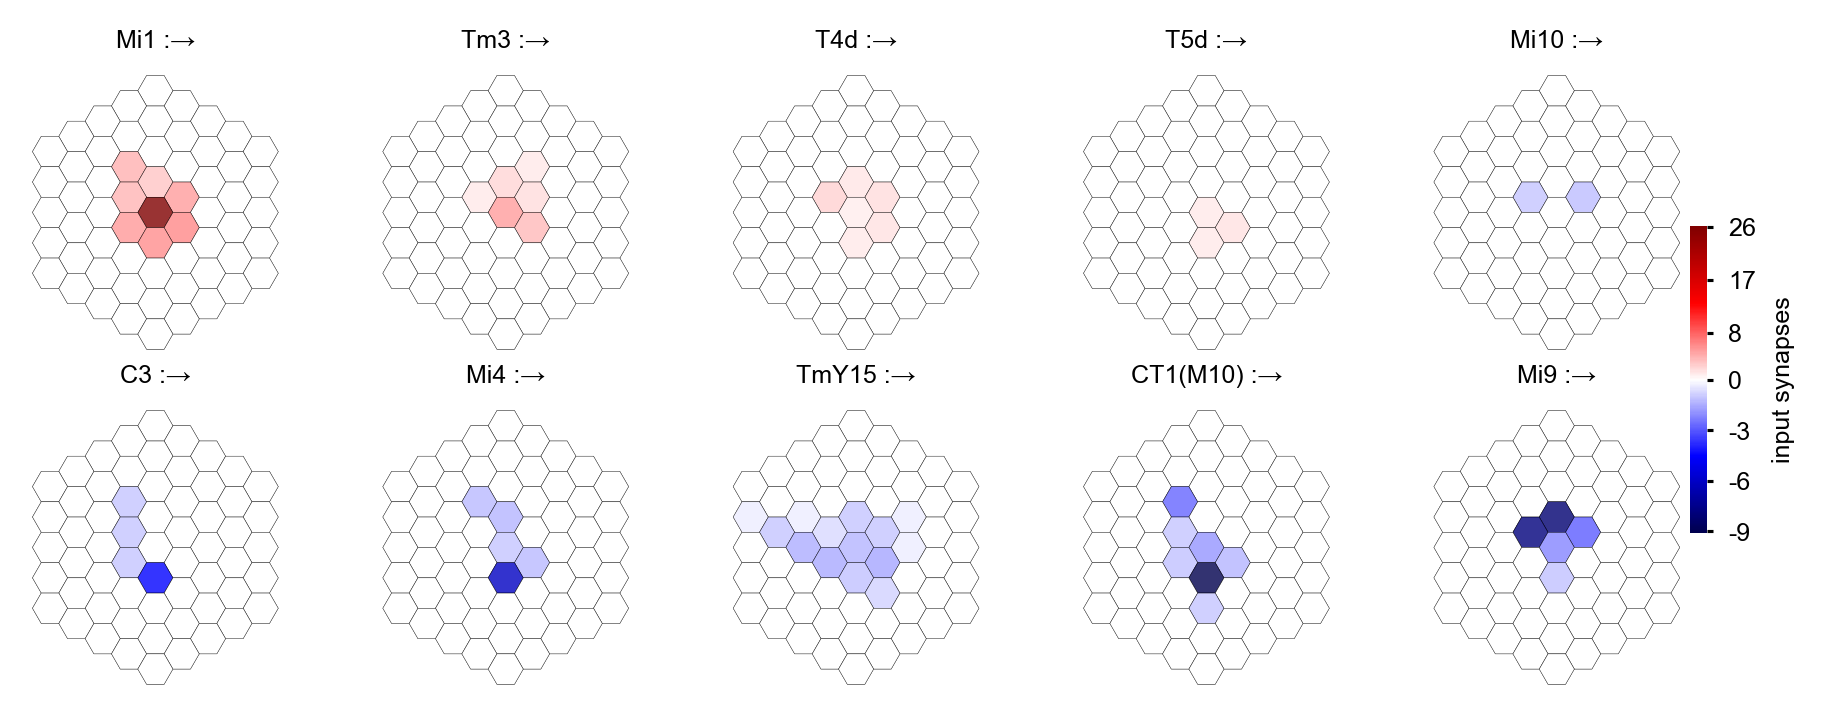

In [38]:
fig, ax = si_receptive_fields(
    cell_type,
    ensemble,
    title="",
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
    fontsize=fontsize,
)

## Anatomical projective fields

``` json
{
  "caption": "\\textbf{Anatomical projective fields.}",
  "label": "fig:si_proj_fields",
  "long_caption": "Each colored hexagon is an output connection, with the connection strength characterized by the average number of synapses that we count from the EM reconstruction. Red indicates excitatory synapses, blue indicates inhibitory synapses from inferred signs. Filters in the order of their total number of synapses.",
  "scrolled": false,
  "trusted": false
}
```

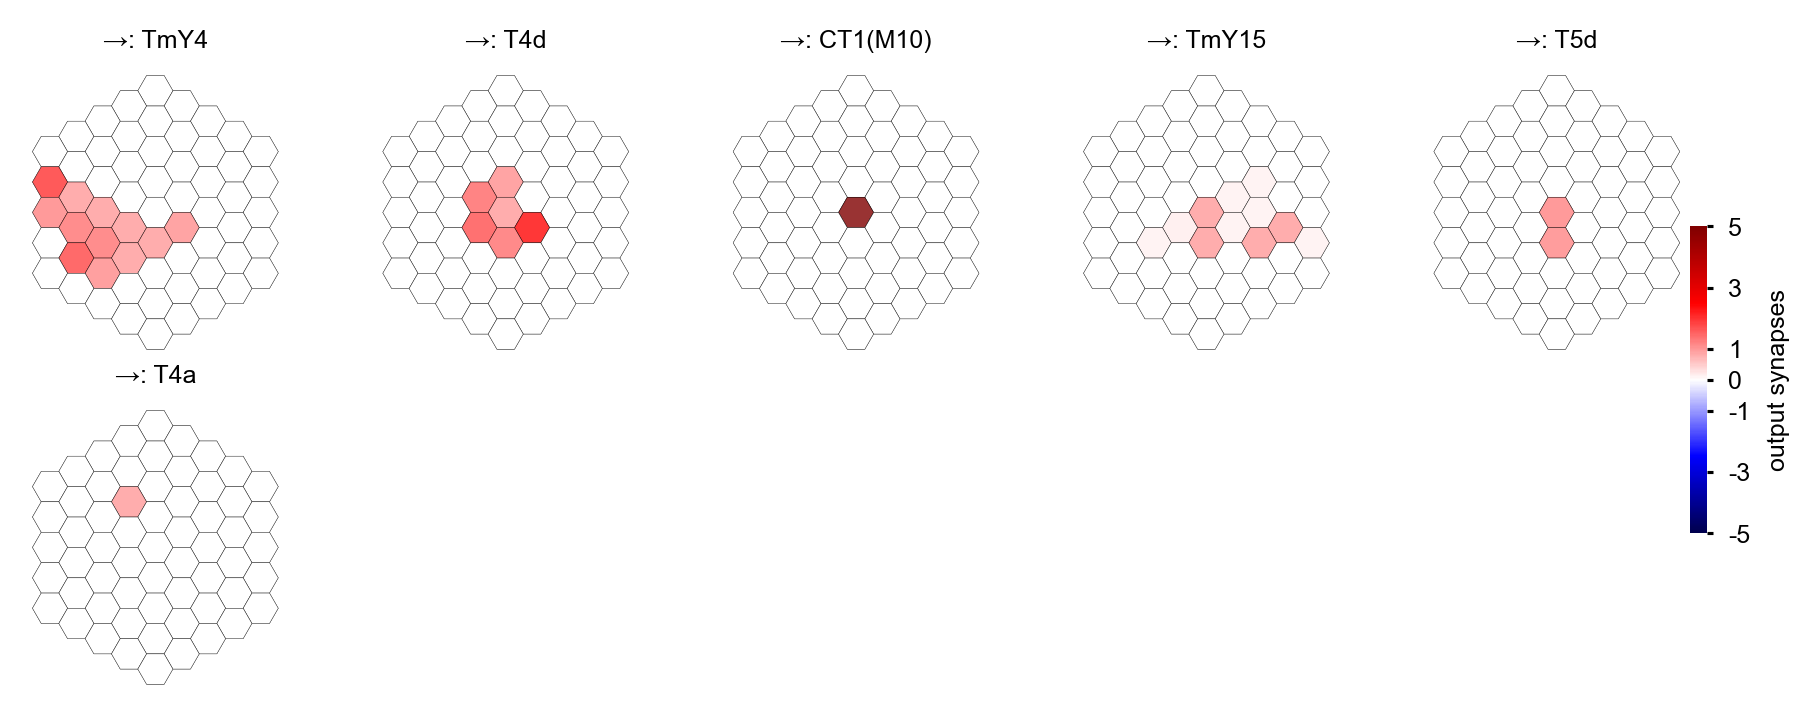

In [37]:
_ = si_projective_fields(
    cell_type,
    ensemble,
    title="",
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
    fontsize=fontsize,
)

## Clustering of the responses to naturalistic stimuli

``` json
{
  "caption": "\\textbf{Clustering of the responses to naturalistic stimuli.}",
  "label": "fig:si_clustering",
  "long_caption": "Clustering of the 50 models based on the cell type responses to naturalistic scenes from the Sintel dataset. Scatterpoints represent individual models colored by their task error.",
  "trusted": false
}
```

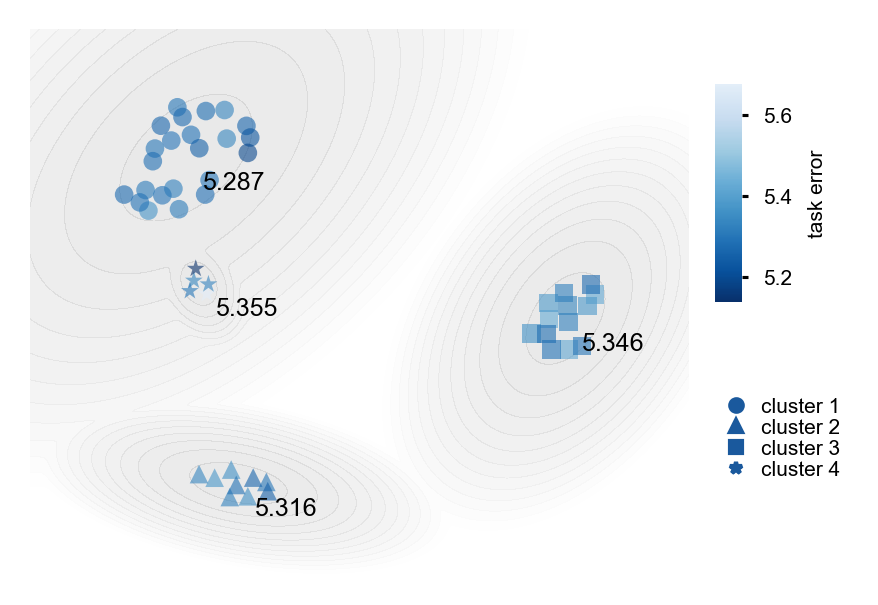

In [39]:
fig = si_clustering(
    cell_type,
    ensemble,
    naturalistic_responses_subwrap=naturalistic_responses_subwrap,
    validation_subwrap=validation_subwrap,
    validation_loss_fn=validation_loss_fn,
    embedding_kwargs=embedding_kwargs,
    gm_kwargs=gm_kwargs,
    title="",
    figsizecm=[panel_width_cm * 2, panel_height_cm * 2],
    fontsize=fontsize,
)

## Responses to flashes

```json
{
    "editable": true,
    "slideshow": {
        "slide_type": ""
    },
    "tags": [],
    "trusted": false,
    "caption": "\\textbf{Responses to flashes.}",
    "label": "fig:si_flash_resp",
    "long_caption": "The top row shows responses to ON-flashes (yellow), the bottom row shows responses to OFF-flashes (magenta). The responses from the 50 different models that are separated into the different clusters (columns) overlay, with better task-performing models on top. Responses from better task-performing models are more saturated.  The circular flashes (1s) cover 6 ommatidia in radius and are presented at time zero. Before and after, a grey-stimulus leads to a stationary state of the network."
}
```

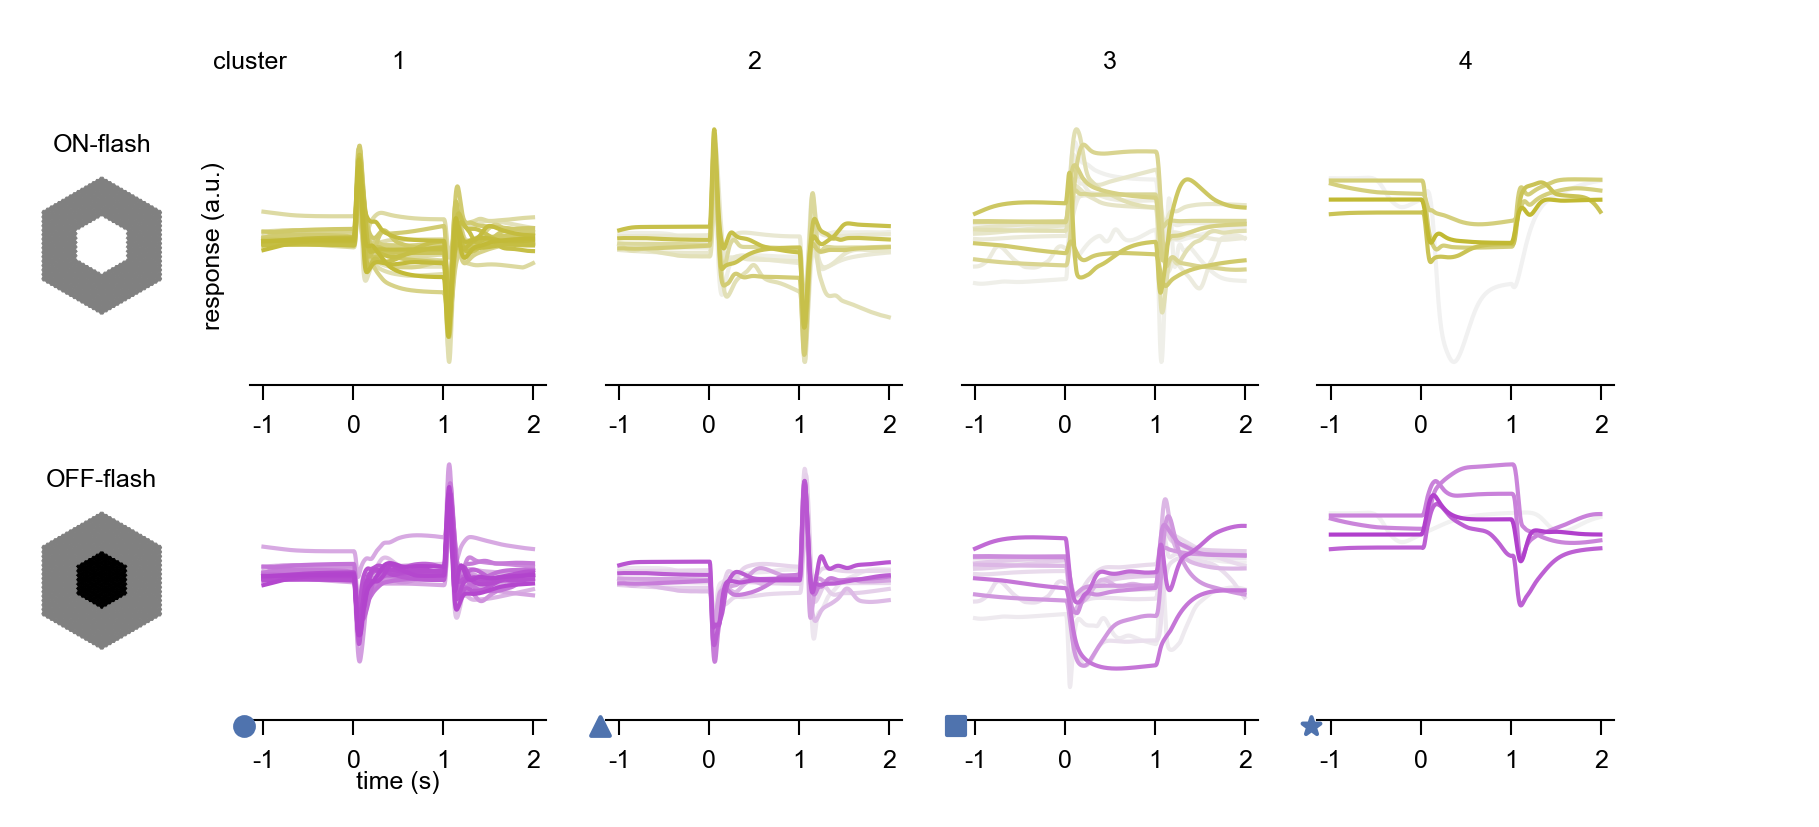

In [41]:
fig = si_flash_response_traces_horizontal(
    cell_type,
    ensemble,
    flash_subwrap=flash_subwrap,
    naturalistic_responses_subwrap=naturalistic_responses_subwrap,
    validation_subwrap=validation_subwrap,
    validation_loss_fn=validation_loss_fn,
    embedding_kwargs=embedding_kwargs,
    gm_kwargs=gm_kwargs,
    title="",
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
    fontsize=fontsize,
)

## Responses to single-ommatidium flashes 

```json
{
    "editable": true,
    "slideshow": {
        "slide_type": ""
    },
    "tags": [],
    "trusted": false,
    "caption": "\\textbf{Cluster-average responses to single-ommatidium flashes.}",
    "label": "fig:si_average_flash_resp",
    "long_caption": "Responses to single-ommatidium ON-flashes (dark blue shades) and single-ommatidium OFF-flashes (light blue shades) of 20ms, 50ms, 100ms, 200ms, 300ms duration. The flashes occur at second zero."
}
```

In [11]:
from dvs.plots.figsize_utils import fit_panel_size
from dvs.plots.decoration import patch_type_str, flash_response_color_labels, color_labels, color_label
from dvs.analysis.response_views.moving_edge_currents import adapt_color_alpha
from dvs.plots.decoration import patch_type_texts
from dvs.utils.activity_utils import StimulusResponseIndexer, CellTypeArray
from dvs.plots import truncate_colormap
from dvs.analysis.si_cell_profile import add_cluster_markers_to_axes
from dvs.plots.plt_utils import inset_hex_stim

In [21]:
validation_subwrap = "original_validation_v2"
validation_loss_fn = "epe"
central_impulses_subwrap = "{}/{}_based/central_impulses_responses"
dt = 1/1000
subdir = central_impulses_subwrap.format(validation_subwrap, validation_loss_fn, dt)
stim_config = ensemble[0].tnn[subdir].spec
dataset = dvs.datasets.dots.CentralImpulses(**stim_config)
dataset.dt = stim_config.dt
arg_df = dataset.arg_df
central_impulse_responses = np.array(
    [
        nnv.tnn[subdir].network_states.nodes.activity_central[:]
        for nnv in ensemble.values()
    ]
)

In [22]:
clusters = ensemble.cluster_indices(
        cell_type,
        naturalistic_responses_wrap=naturalistic_responses_subwrap,
        validation_subwrap=validation_subwrap,
        validation_loss_fn=validation_loss_fn,
        embedding_kwargs=embedding_kwargs,
        gm_kwargs=gm_kwargs,
    )

KeyboardInterrupt: 

In [14]:
cir_view = StimulusResponseIndexer(
    arg_df,
    CellTypeArray(central_impulse_responses, ctome=ensemble.ctome),
    dataset.dt,
    dataset.t_pre,
    stim_sample_dim=1,
    temporal_dim=2,
)

In [15]:
rnorm = ensemble.responses_to_naturalistic_stimulus_norm(naturalistic_responses_subwrap, rectified=False)

In [16]:
cir_view = (cir_view
                .divide_by_given_array(rnorm[:], dims=(0, -1))
                .between_seconds(-cir_view.dt, 1.0)
           )

In [17]:
durations = [0.02, 0.05, 0.1, 0.2, 0.3]
on_cmap = truncate_colormap(plt.cm.Blues_r, minval=0., maxval=0.4).resampled(len(durations))
off_cmap = truncate_colormap(plt.cm.Blues_r, minval=0.5, maxval=0.9).resampled(len(durations))
cmaps = {
    1.: [on_cmap(i) for i in range(on_cmap.N)][::-1],
    0: [off_cmap(i) for i in range(off_cmap.N)][::-1]
}

IndexError: The index (11) is out of range.

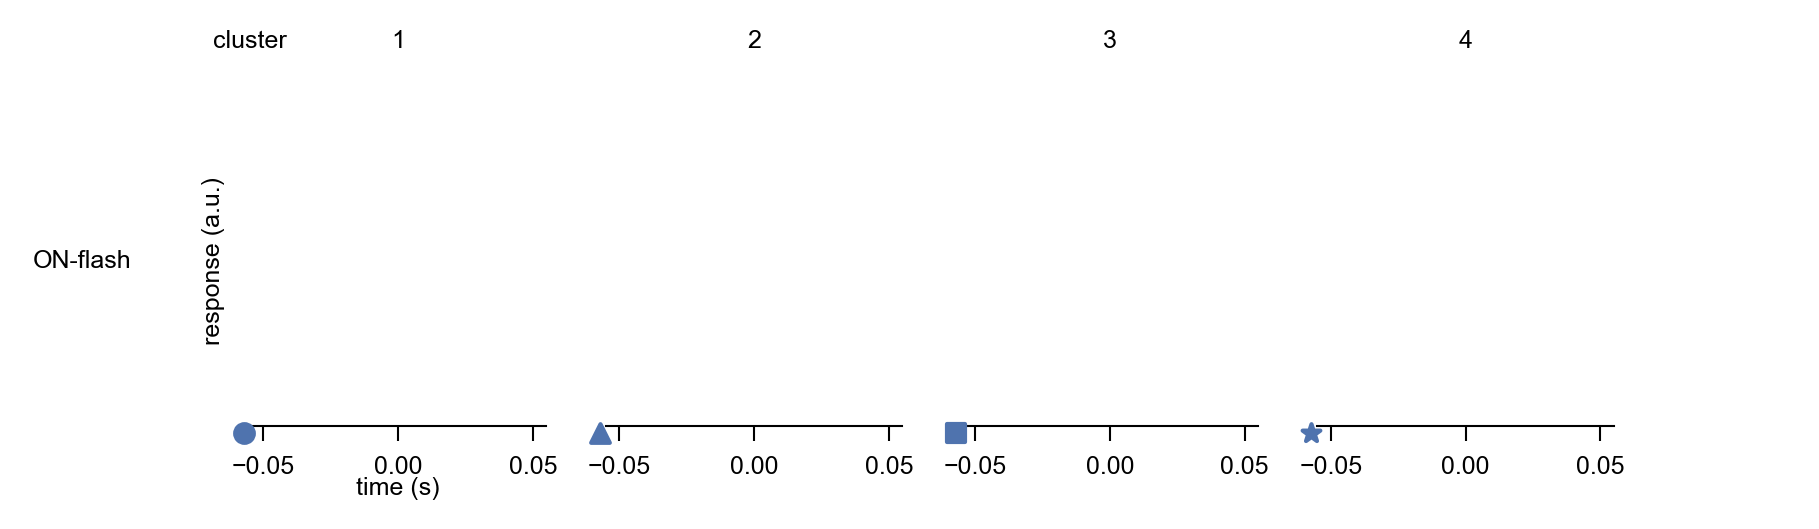

In [18]:
figsize_cm = figure_size_cm(
    1,
    len(clusters),
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
)
fig, axes = figsize_cm.axis_grid(
    wspace=0.3, hspace=0.1, as_matrix=True, fontsize=fontsize
)

for column, indices in clusters.items():
    ax = axes[0, column]
    for q, duration in enumerate(durations[::-1]):
        for intensity in [0, 1]:
            color = cmaps[intensity][q] #plt.cm.Blues(256) if intensity == 1 else plt.cm.Blues(128)
#                 linestyle = "solid" if intensity == 1 else "dashed"
            zorder = 1 if intensity == 1 else 0
            r = (
                cir_view.where_stim_args(t_impulse=duration, intensity=intensity)
                .cell_type(cell_type)[indices]
            )
            trf = r[:].squeeze().T
            mean = trf.mean(axis=1)
            # subtract baseline after model averaging to plot it centered
            mean = mean - mean[[0]]
            #         ci = np.quantile(trf, [0.25, 0.75], axis=1)
            ax.plot(r.time, mean, linewidth=0.5, color=color, zorder=zorder)
            
for row in range(axes.shape[0]):
    for column in range(axes.shape[1]):
        ax = axes[row, column]
        if row == 0:
            ax.annotate(
                f"{column+1}",
                xy=(0.5, 1.2),
                ha="center",
                va="top",
                fontsize=fontsize,
                rotation=0,
                xycoords=ax.transAxes,
            )
        if row == 0 and column == 0:
            ax.annotate(
                "cluster",
                xy=(0.0, 1.2),
                ha="center",
                va="top",
                fontsize=fontsize,
                rotation=0,
                xycoords=ax.transAxes,
            )
            ax.annotate(
                "ON-flash",
                xy=(-0.4, 0.5),
                ha="right",
                va="center",
                fontsize=fontsize,
                rotation=0,
                xycoords=ax.transAxes,
            )
            ax.set_ylabel(
                f"response (a.u.)",
                fontsize=fontsize,
                labelpad=-1,
            )
        elif column == 0 and row != 0:
            ax.set_ylabel("")
            ax.annotate(
                "OFF-flash",
                xy=(-0.4, 0.5),
                ha="right",
                va="center",
                fontsize=fontsize,
                rotation=0,
                xycoords=ax.transAxes,
            )
        else:
            ax.set_ylabel(
                "",
                fontsize=fontsize,
                labelpad=-1,
            )

        if column == 0 and row == axes.shape[0] - 1:
            ax.set_xlabel("time (s)", fontsize=fontsize, labelpad=-0.5)
            dvs.plots.rm_spines(ax, ("left", "top", "right"), rm_xticks=False)
        else:
            ax.set_xlabel("", fontsize=fontsize, labelpad=-0.5)
            dvs.plots.rm_spines(ax, ("left", "top", "right"), rm_xticks=False)


add_cluster_markers_to_axes(fig, axes[0], x_offset=-0.02, y_offset=-0.02)


inset_ax1 = inset_hex_stim(
    fig,
    axes[0, 0],
    dataset[11][1050],
    bounds=[-0.75, 0.6, 0.4, 0.4],
    title="ON-flashes",
    title_color=cmaps[1][-1],
    max_extent=5,
    alpha=1
)
inset_ax2 = inset_hex_stim(
    fig,
    axes[0, 0],
    dataset[5][1050],
    bounds=[-0.75, 0., 0.4, 0.4],
    title="OFF-flashes",
    title_color=cmaps[0][-1],
    max_extent=5,
    alpha=1
)

## Peak responses to moving edges

```json
{
    "caption": "\\textbf{Peak responses to moving edges.}",
    "editable": true,
    "label": "fig:si_motion_edges",
    "long_caption": "The top row shows peak responses to moving ON-edges (red), the bottom row shows peak responses to moving OFF-edges (turqoise). The peak responses are averaged over edge-speeds. Edge-stimuli move in different directions from 0 to 360 degrees. The responses from the different models in the different clusters (columns) overlay. Responses from better task-performing models are more saturated.",
    "slideshow": {
        "slide_type": ""
    },
    "tags": [],
    "trusted": true
}
```

In [43]:
clusters = ensemble.cluster_indices(
        cell_type,
        naturalistic_responses_wrap=naturalistic_responses_subwrap,
        validation_subwrap=validation_subwrap,
        validation_loss_fn=validation_loss_fn,
        embedding_kwargs=embedding_kwargs,
        gm_kwargs=gm_kwargs,
    )

In [44]:
cmap_on = dvs.utils.color_utils.color_to_cmap(
    dvs.utils.color_utils.ON, start_color="#F1F1F1", N=len(ensemble)
)
cmap_off = dvs.utils.color_utils.color_to_cmap(
    dvs.utils.color_utils.OFF, start_color="#F1F1F1", N=len(ensemble)
)
task_error_on_colors = np.array([cmap_on(i) for i in range(cmap_on.N)])[::-1]
task_error_off_colors = np.array([cmap_off(i) for i in range(cmap_on.N)])[::-1]

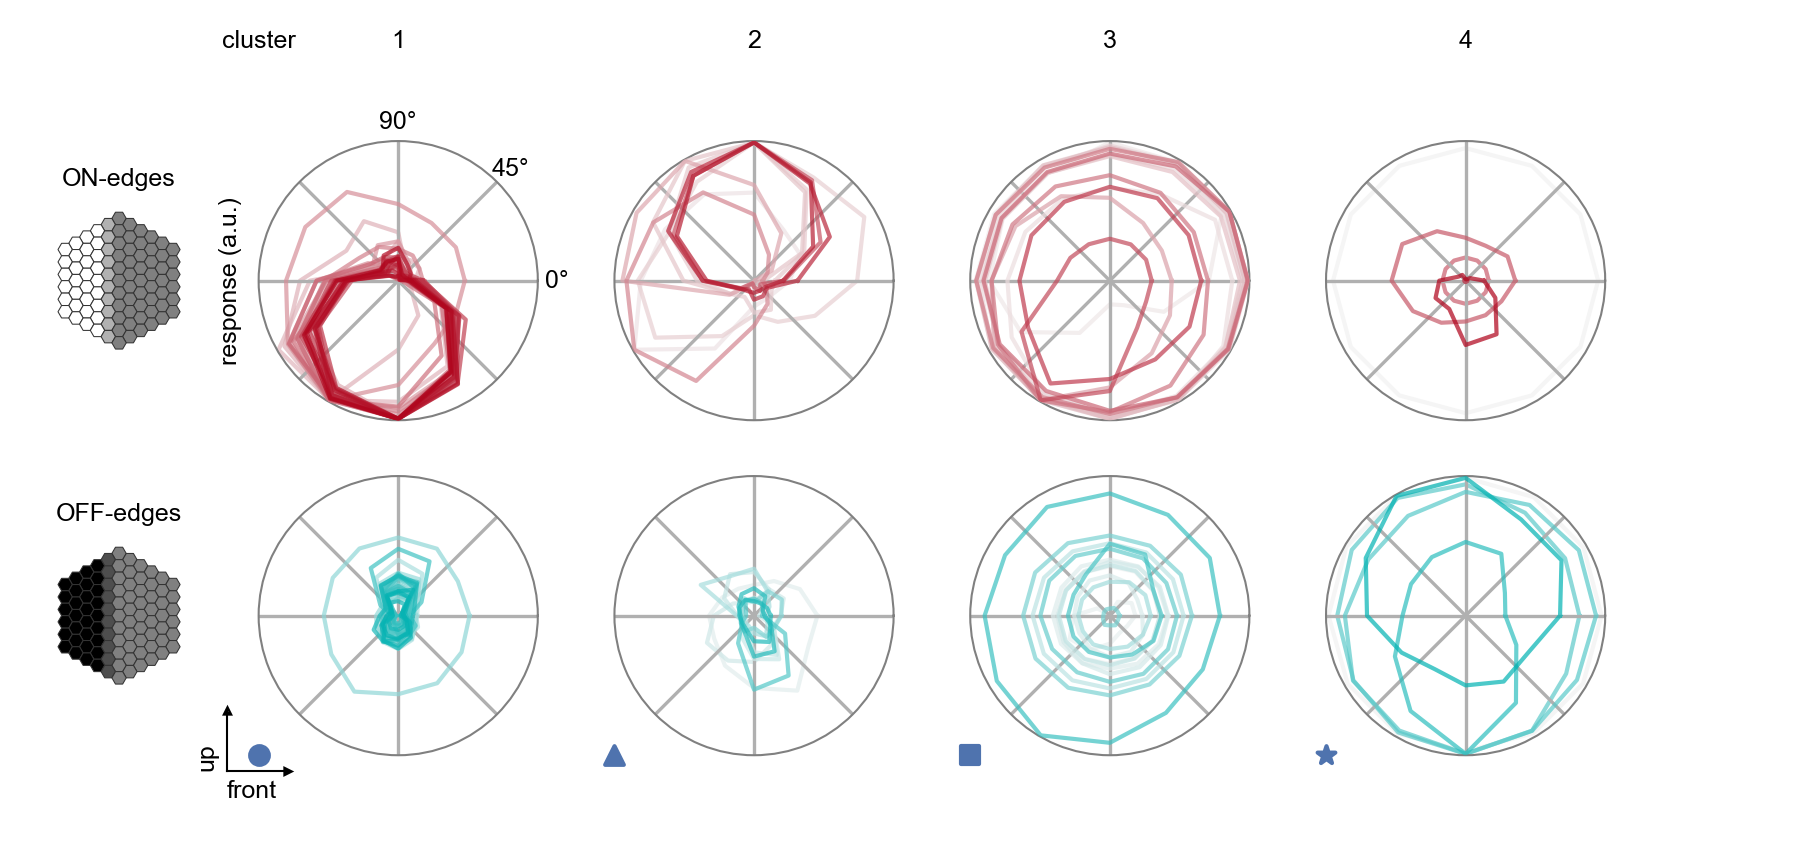

In [45]:
figsize_cm = figure_size_cm(
    2,
    len(clusters),
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
)
fig, axes = figsize_cm.axis_grid(
    wspace=0.3, hspace=0.1, as_matrix=True, fontsize=fontsize, projection="polar"
)

axes[0, 0].annotate(
    "cluster",
    xy=(0, 1.4),
    ha="center",
    va="top",
    xycoords=axes[0, 0].transAxes,
    fontsize=fontsize,
)
axes[0, 0].set_ylabel(
    "response (a.u.)",
    fontsize=fontsize,
)
axes[0, 0].annotate(
    "ON",
    xy=(-0.4, 0.5),
    ha="right",
    va="center",
    fontsize=fontsize,
    rotation=0,
    xycoords=axes[0, 0].transAxes,
)
axes[1, 0].annotate(
    "OFF",
    xy=(-0.4, 0.5),
    ha="right",
    va="center",
    fontsize=fontsize,
    rotation=0,
    xycoords=axes[1, 0].transAxes,
)

for row, intensity in enumerate([1, 0]):
    for column, indices in clusters.items():
        if row == 0:
            axes[0, column].annotate(
                f"{column+1}",
                xy=(0.5, 1.4),
                ha="center",
                va="top",
                fontsize=fontsize,
                rotation=0,
                xycoords=axes[0, column].transAxes,
            )

        with ensemble.model_items(indices):
            ensemble.motion_tuning(
                cell_type,
                movingedge_subwrap,
                naturalistic_responses_subwrap,
                intensity,
                fig=fig,
                ax=axes[row, column],
                colors=task_error_on_colors[indices]
                if intensity == 1
                else task_error_off_colors[indices],
                zorder=np.arange(len(ensemble))[::-1],
                linewidth=1.0,
                anglepad=-6,
                legend=False,
                alpha=0.7,
                fontsize=fontsize,
            )
        if (row, column) != (0, 0):
            axes[row, column].set_xticklabels([])

add_coordinate_system(
    fig,
    pos="origin",
    x_offset=-0.04,
    y_offset=-0.02,
    xlabel="front",
    ylabel="up",
    fontsize=fontsize,
)


n_clusters = len(clusters)
marker_size = 20
MARKERS = clustering._check_markers(n_clusters)
for column in range(axes.shape[1]):
    marker = MARKERS[column]
    plt_utils.add_cluster_marker(
        fig,
        axes[-1, column],
        marker=marker,
        color="#4F73AE",
        marker_size=marker_size,
    )


for ax in axes.flatten():
    for text in ax.texts:
        if "ON".lower() in text.get_text().lower():
            text.set_text("ON-edge")
        if "OFF".lower() in text.get_text().lower():
            text.set_text("OFF-edge")
            
inset_ax1 = inset_hex_stim(
    fig,
    axes[0, 0],
    ensemble[0].movingbar.get(angle=0, 
                           width=80, 
                           speed=19.0, 
                           intensity=1).cpu().numpy()[230],
    bounds=[-0.75, 0.25, 0.5, 0.5],
    title="ON-edges",
    alpha=1,
    max_extent=5,
    edgecolor="0.2"
)
inset_ax2 = inset_hex_stim(
    fig,
    axes[1, 0],
    ensemble[0].movingbar.get(angle=0, 
                           width=80, 
                           speed=19.0, 
                           intensity=0).cpu().numpy()[230],
    bounds=[-0.75, 0.25, 0.5, 0.5],
    title="OFF-edges",
    alpha=1,
    max_extent=5,
    edgecolor="0.2"
)            

## Peak responses to moving edges from best-performing models

```json
{
  "caption": "\\textbf{Peak responses to moving edges from task-optimal models.}",
  "label": "fig:si_motion_edges_best",
  "long_caption": "The top row shows peak responses to moving ON-edges, the bottom row shows peak responses to moving OFF-edges of varying speeds from 13.92$^\\circ$/s to 145$^\\circ$/s (yellow to dark blue). The edge-stimuli move in different directions from 0 to 360 degrees and at different speeds. Responses from the task-optimal model in the respective cluster.",
  "trusted": false
}
```

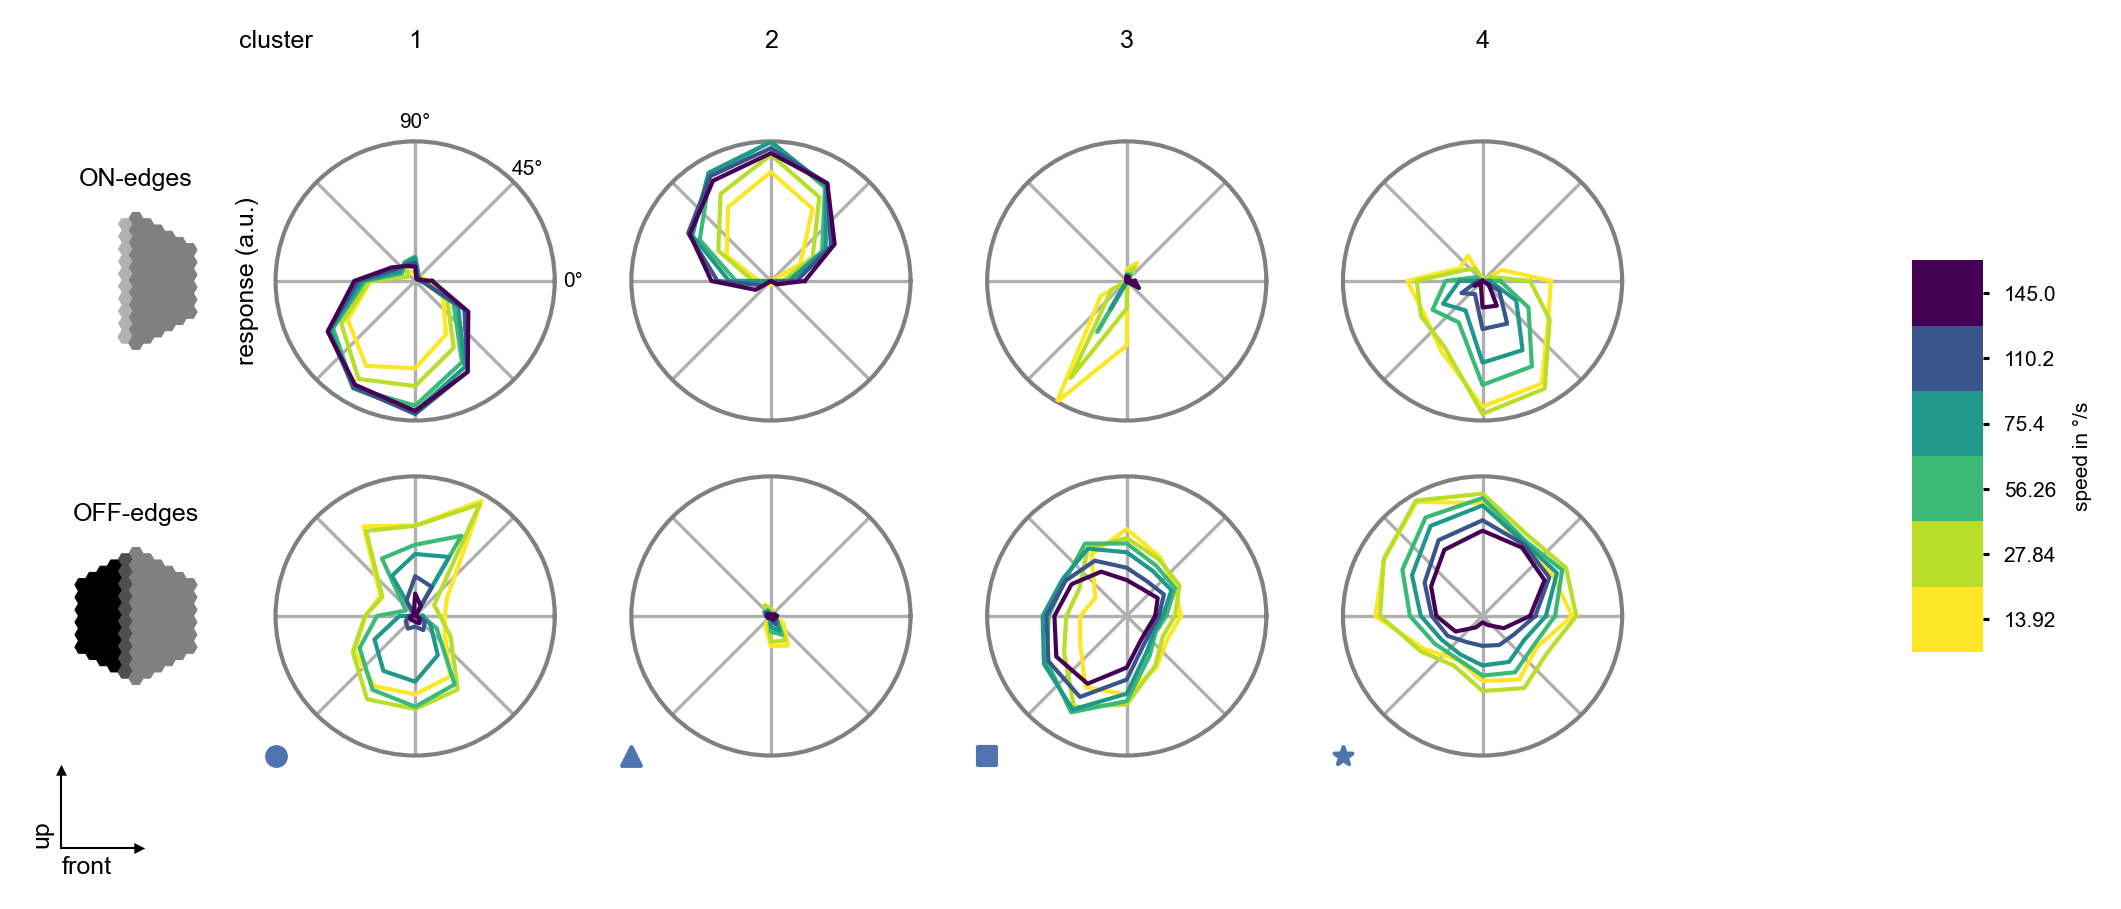

In [25]:
_ = si_motion_tuning_edges(
    cell_type,
    ensemble,
    movingedge_subwrap=movingedge_subwrap,
    naturalistic_responses_subwrap=naturalistic_responses_subwrap,
    validation_subwrap=validation_subwrap,
    validation_loss_fn=validation_loss_fn,
    embedding_kwargs=embedding_kwargs,
    gm_kwargs=gm_kwargs,
    title="",
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
    fontsize=fontsize,
)

## Responses to moving edges from best-performing models

```json
{
  "caption": "\\textbf{Responses to moving edges from task-optimal models.}",
  "label": "fig:si_moving_edge_responses_best_home_column",
  "long_caption": "Responses to moving ON-edges (top row) and to moving OFF-edges (bottom row). Edges move in different directions from 0 to 360 degrees and at different speeds. Responses are from the task-optimal model in the respective cluster. Edges moving at 75.4$^\\circ$/s in all cardinal directions (green 0$^\\circ$, blue 90$^\\circ$, red 180$^\\circ$, yellow 270$^\\circ$) from -22.5 to 22.5$^\\circ$ visual angle. ",
  "trusted": false
}
```

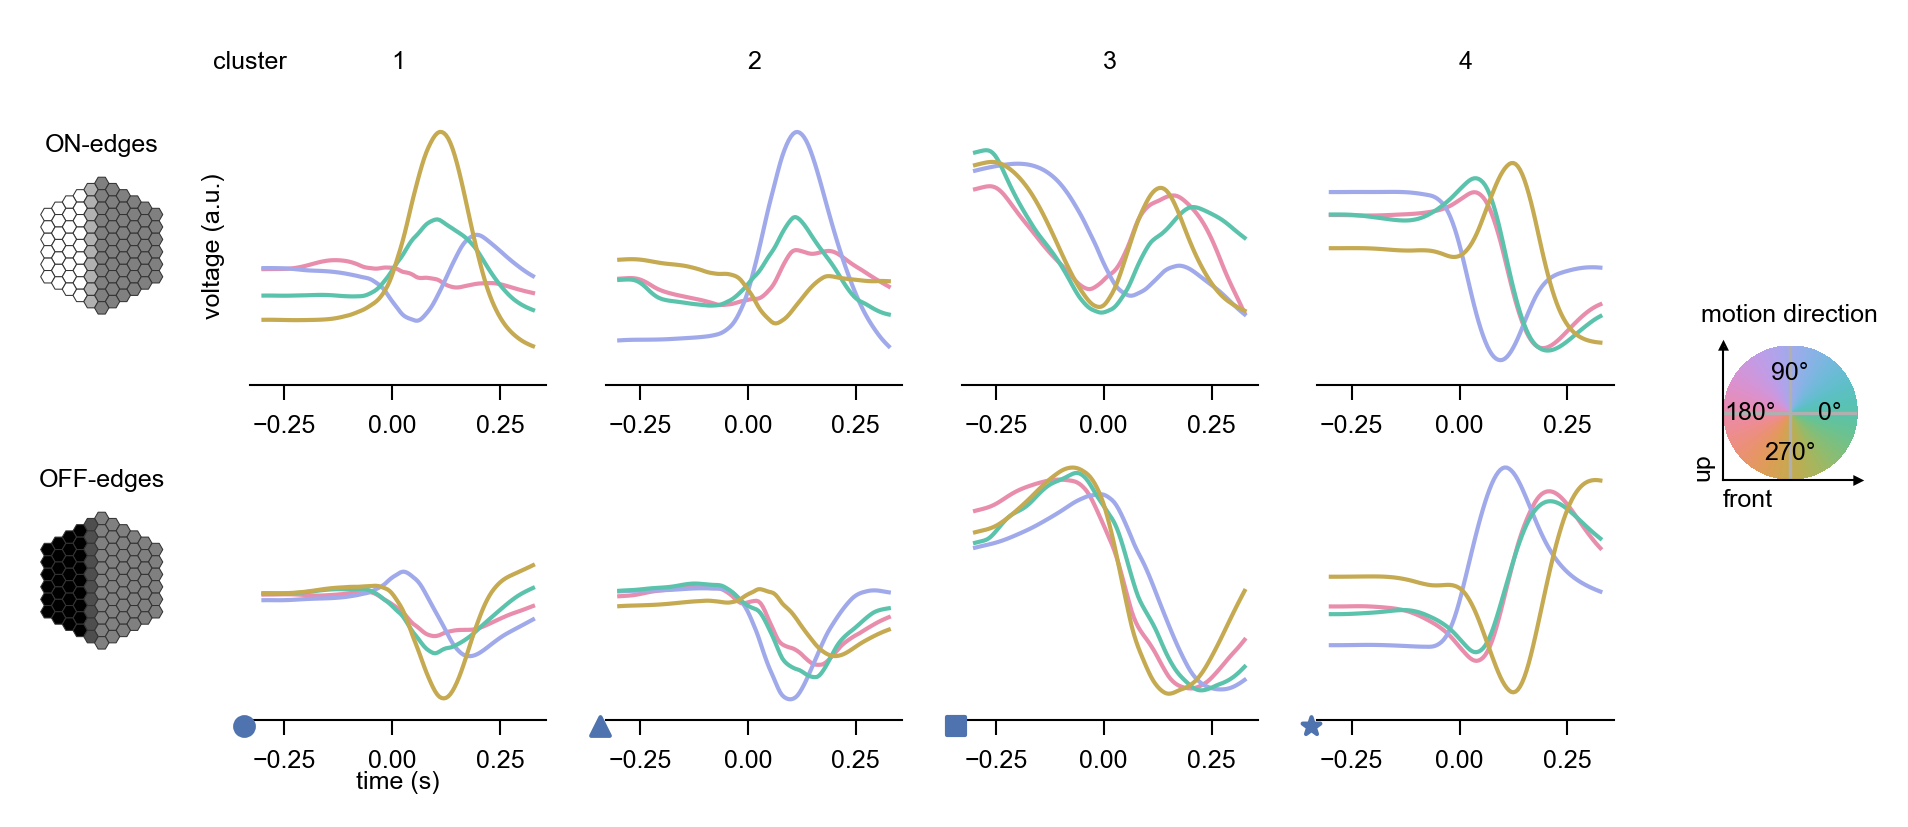

In [26]:
_ = si_edge_response_traces_horizontal(
    cell_type,
    ensemble,
    movingedge_subwrap=movingedge_subwrap,
    naturalistic_responses_subwrap=naturalistic_responses_subwrap,
    validation_subwrap=validation_subwrap,
    validation_loss_fn=validation_loss_fn,
    embedding_kwargs=embedding_kwargs,
    gm_kwargs=gm_kwargs,
    title="",
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
    fontsize=fontsize,
)

## Peak responses to moving bars

```json
{
    "caption": "\\textbf{Peak responses to moving bars.}",
    "editable": true,
    "label": "fig:si_motion_bars",
    "long_caption": "The top row shows peak responses to moving ON-bars (red), the bottom row shows peak responses to moving OFF-bars (turqoise). The peak responses are averaged over bar-speeds. Bar-stimuli move in different directions from 0 to 360 degrees. The responses from the different models in the different clusters (columns) overlay. Responses from better task-performing models are more saturated.",
    "slideshow": {
        "slide_type": ""
    },
    "tags": [],
    "trusted": true
}
```

In [47]:
clusters = ensemble.cluster_indices(
    cell_type,
    naturalistic_responses_wrap=naturalistic_responses_subwrap,
    validation_subwrap=validation_subwrap,
    validation_loss_fn=validation_loss_fn,
    embedding_kwargs=embedding_kwargs,
    gm_kwargs=gm_kwargs,
)

In [48]:
cmap_on = dvs.utils.color_utils.color_to_cmap(
    dvs.utils.color_utils.ON, start_color="#F1F1F1", N=len(ensemble)
)
cmap_off = dvs.utils.color_utils.color_to_cmap(
    dvs.utils.color_utils.OFF, start_color="#F1F1F1", N=len(ensemble)
)
task_error_on_colors = np.array([cmap_on(i) for i in range(cmap_on.N)])[::-1]
task_error_off_colors = np.array([cmap_off(i) for i in range(cmap_on.N)])[::-1]

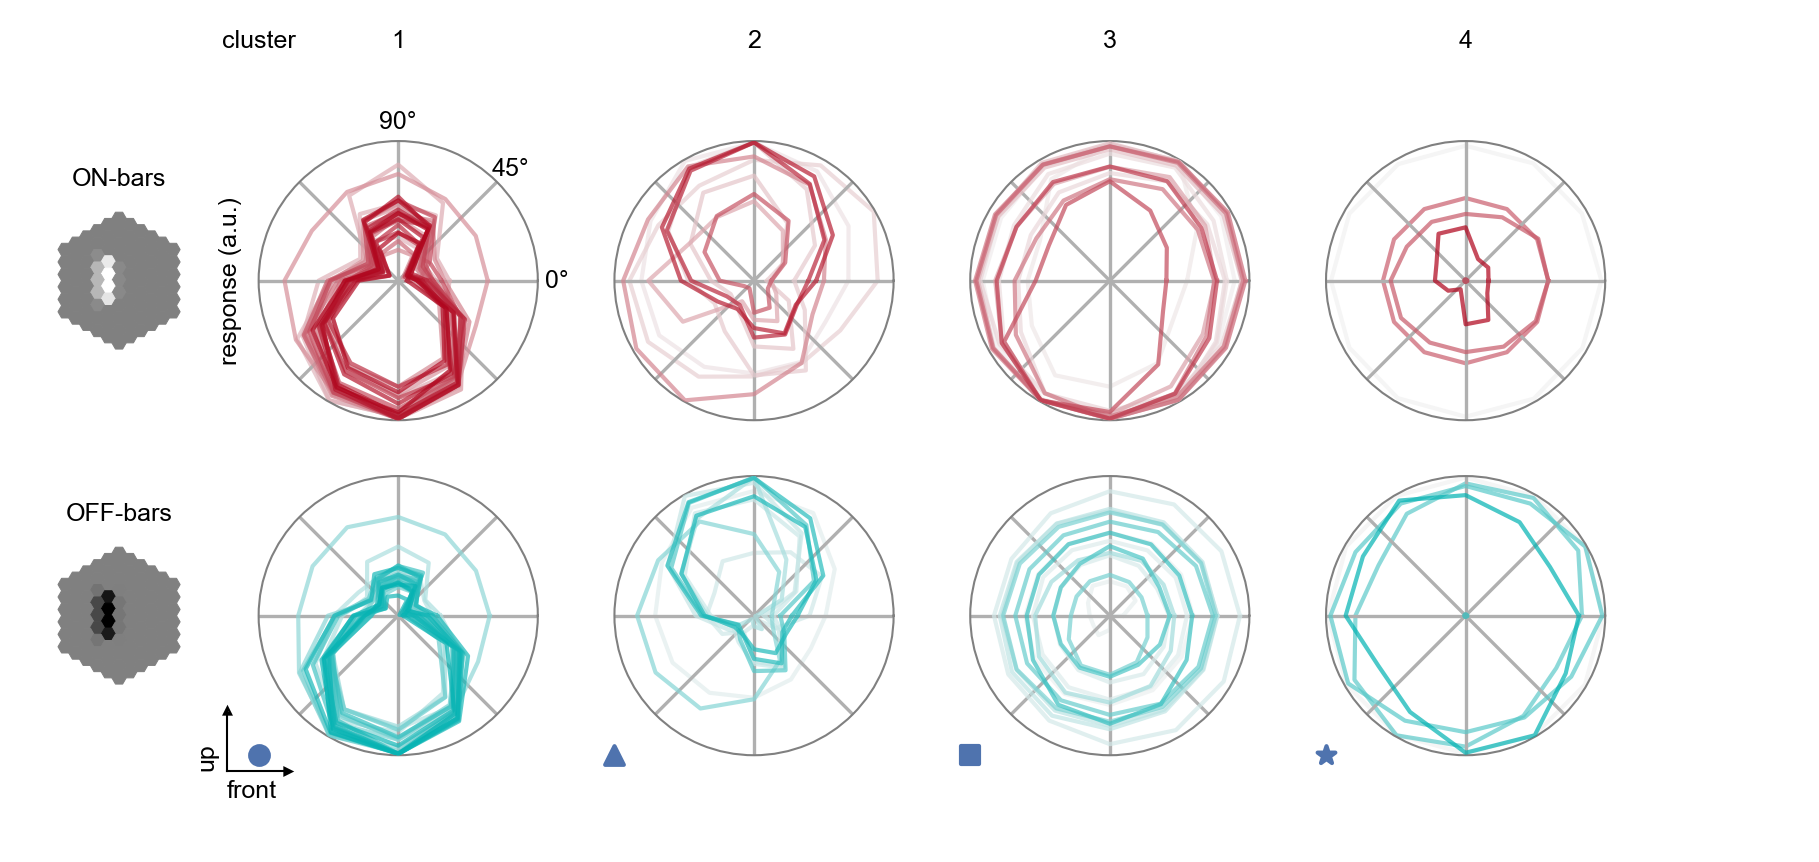

In [49]:
figsize_cm = figure_size_cm(
    2,
    len(clusters),
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
)
fig, axes = figsize_cm.axis_grid(
    wspace=0.3, hspace=0.1, as_matrix=True, fontsize=fontsize, projection="polar"
)

axes[0, 0].annotate(
    "cluster",
    xy=(0, 1.4),
    ha="center",
    va="top",
    xycoords=axes[0, 0].transAxes,
    fontsize=fontsize,
)
axes[0, 0].set_ylabel(
    "response (a.u.)",
    fontsize=fontsize,
)
axes[0, 0].annotate(
    "ON",
    xy=(-0.4, 0.5),
    ha="right",
    va="center",
    fontsize=fontsize,
    rotation=0,
    xycoords=axes[0, 0].transAxes,
)
axes[1, 0].annotate(
    "OFF",
    xy=(-0.4, 0.5),
    ha="right",
    va="center",
    fontsize=fontsize,
    rotation=0,
    xycoords=axes[1, 0].transAxes,
)

for row, intensity in enumerate([1, 0]):
    for column, indices in clusters.items():
        if row == 0:
            axes[0, column].annotate(
                f"{column+1}",
                xy=(0.5, 1.4),
                ha="center",
                va="top",
                fontsize=fontsize,
                rotation=0,
                xycoords=axes[0, column].transAxes,
            )

        with ensemble.model_items(indices):
            ensemble.motion_tuning(
                cell_type,
                movingbar_subwrap,
                naturalistic_responses_subwrap,
                intensity,
                fig=fig,
                ax=axes[row, column],
                colors=task_error_on_colors[indices]
                if intensity == 1
                else task_error_off_colors[indices],
                zorder=np.arange(len(ensemble))[::-1],
                linewidth=1.0,
                anglepad=-6,
                legend=False,
                alpha=0.7,
                fontsize=fontsize,
            )
        if (row, column) != (0, 0):
            axes[row, column].set_xticklabels([])

add_coordinate_system(
    fig,
    pos="origin",
    x_offset=-0.04,
    y_offset=-0.02,
    xlabel="front",
    ylabel="up",
    fontsize=fontsize,
)


n_clusters = len(clusters)
marker_size = 20
MARKERS = clustering._check_markers(n_clusters)
for column in range(axes.shape[1]):
    marker = MARKERS[column]
    plt_utils.add_cluster_marker(
        fig,
        axes[-1, column],
        marker=marker,
        color="#4F73AE",
        marker_size=marker_size,
    )


for ax in axes.flatten():
    for text in ax.texts:
        if "ON".lower() in text.get_text().lower():
            text.set_text("ON-edge")
        if "OFF".lower() in text.get_text().lower():
            text.set_text("OFF-edge")
            
inset_ax1 = inset_hex_stim(
    fig,
    axes[0, 0],
    ensemble[0]
    .movingbar.get(angle=0, width=4, speed=19.0, intensity=1)
    .cpu()
    .numpy()[230],
    bounds=[-0.75, 0.25, 0.5, 0.5],
    title="ON-bars",
    alpha=1,
    max_extent=5,
)
inset_ax2 = inset_hex_stim(
    fig,
    axes[1, 0],
    ensemble[0]
    .movingbar.get(angle=0, width=4, speed=19.0, intensity=0)
    .cpu()
    .numpy()[230],
    bounds=[-0.75, 0.25, 0.5, 0.5],
    title="OFF-bars",
    alpha=1,
    max_extent=5,
)

## Peak responses to moving bars from best-performing models

```json
{
  "caption": "\\textbf{Peak responses to moving bars from task-optimal models.}",
  "label": "fig:si_motion_bars_best",
  "long_caption": "The top row shows peak responses to moving ON-bars, the bottom row shows peak responses to moving OFF-bars of varying speeds from 13.92$^\\circ$/s to 145$^\\circ$/s (yellow to dark blue). The bar-stimuli move in different directions from 0 to 360 degrees and at different speeds. Responses from the task-optimal model in the respective cluster.",
  "trusted": false
}
```

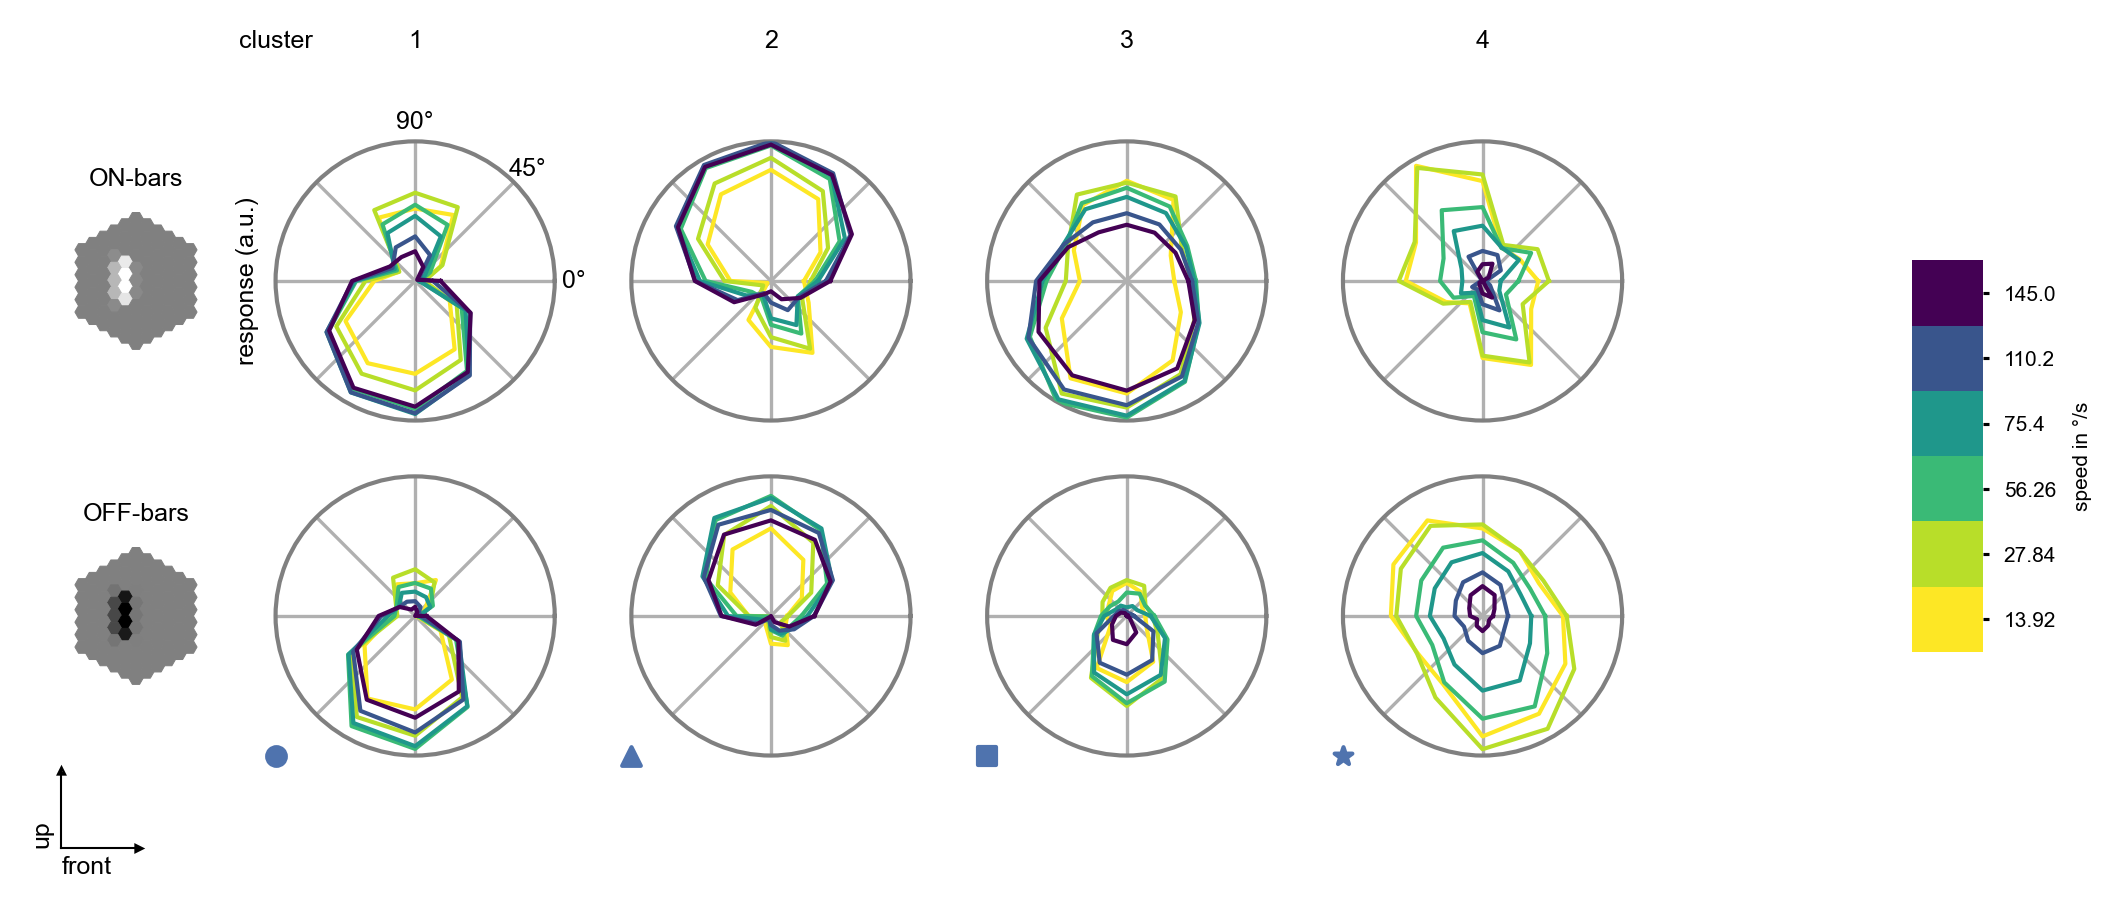

In [30]:
_ = si_motion_tuning_bars(
    cell_type,
    ensemble,
    movingbar_subwrap=movingbar_subwrap,
    naturalistic_responses_subwrap=naturalistic_responses_subwrap,
    validation_subwrap=validation_subwrap,
    validation_loss_fn=validation_loss_fn,
    embedding_kwargs=embedding_kwargs,
    gm_kwargs=gm_kwargs,
    title="",
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
    fontsize=fontsize,
)

## Responses to moving bars from best-performing models

```json
{
  "caption": "\\textbf{Responses to moving bars from task-optimal models.}",
  "label": "fig:si_moving_bar_responses_best_home_column",
  "long_caption": "Responses to moving ON-bars (top row) and to moving OFF-bars (bottom row). Bars move in different directions from 0 to 360 degrees and at different speeds. Responses are from the task-optimal model in the respective cluster. Bars moving at 75.4$^\\circ$/s in all cardinal directions (green 0$^\\circ$, blue 90$^\\circ$, red 180$^\\circ$, yellow 270$^\\circ$) from -22.5 to 22.5$^\\circ$ visual angle. ",
  "trusted": false
}
```

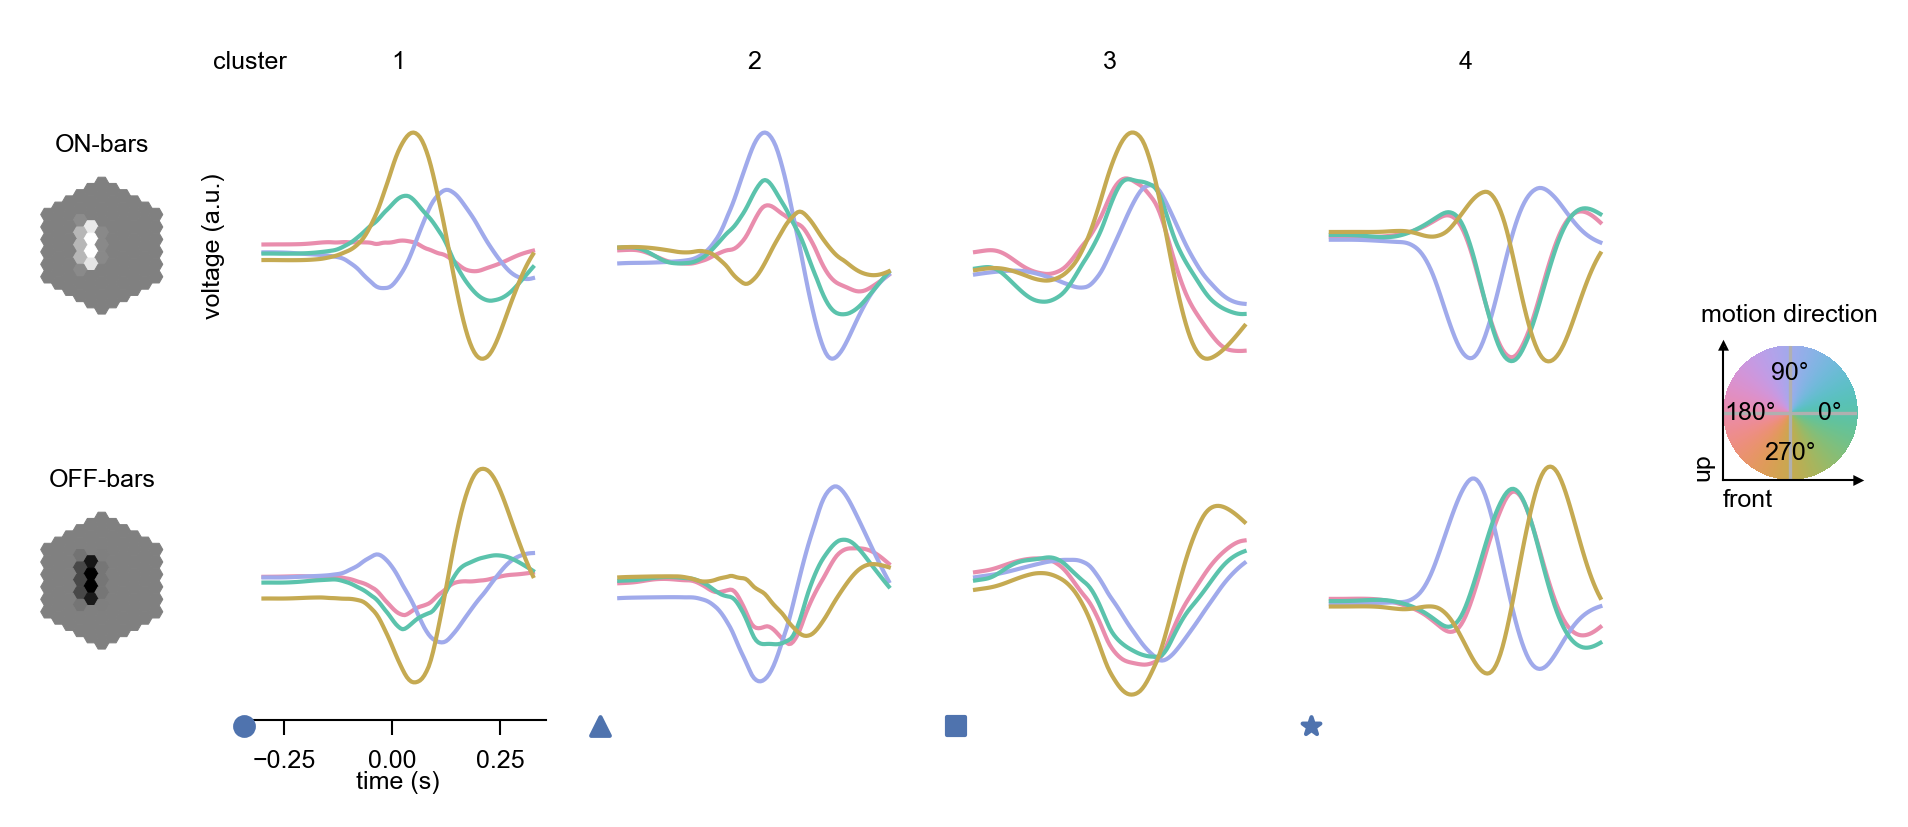

In [31]:
si_bar_response_traces_horizontal(
    cell_type,
    ensemble,
    movingbar_subwrap,
    naturalistic_responses_subwrap=naturalistic_responses_subwrap,
    validation_subwrap=validation_subwrap,
    validation_loss_fn=validation_loss_fn,
    embedding_kwargs=embedding_kwargs,
    gm_kwargs=gm_kwargs,
    title="",
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
    fontsize=fontsize,
)

## Spatio-temporal receptive field

```json
{
  "caption": "\\textbf{Spatio-temporal receptive field.}",
  "label": "fig:si_strf",
  "long_caption": "Responses of the central cell to ON-impulses (5 ms) at single-ommatidium flash locations. The flash occurs at second zero. Responses from the task-optimal model of the respective cluster (rows).  Red indicates depolarization, blue indicates hyperpolarization.",
  "trusted": false
}
```

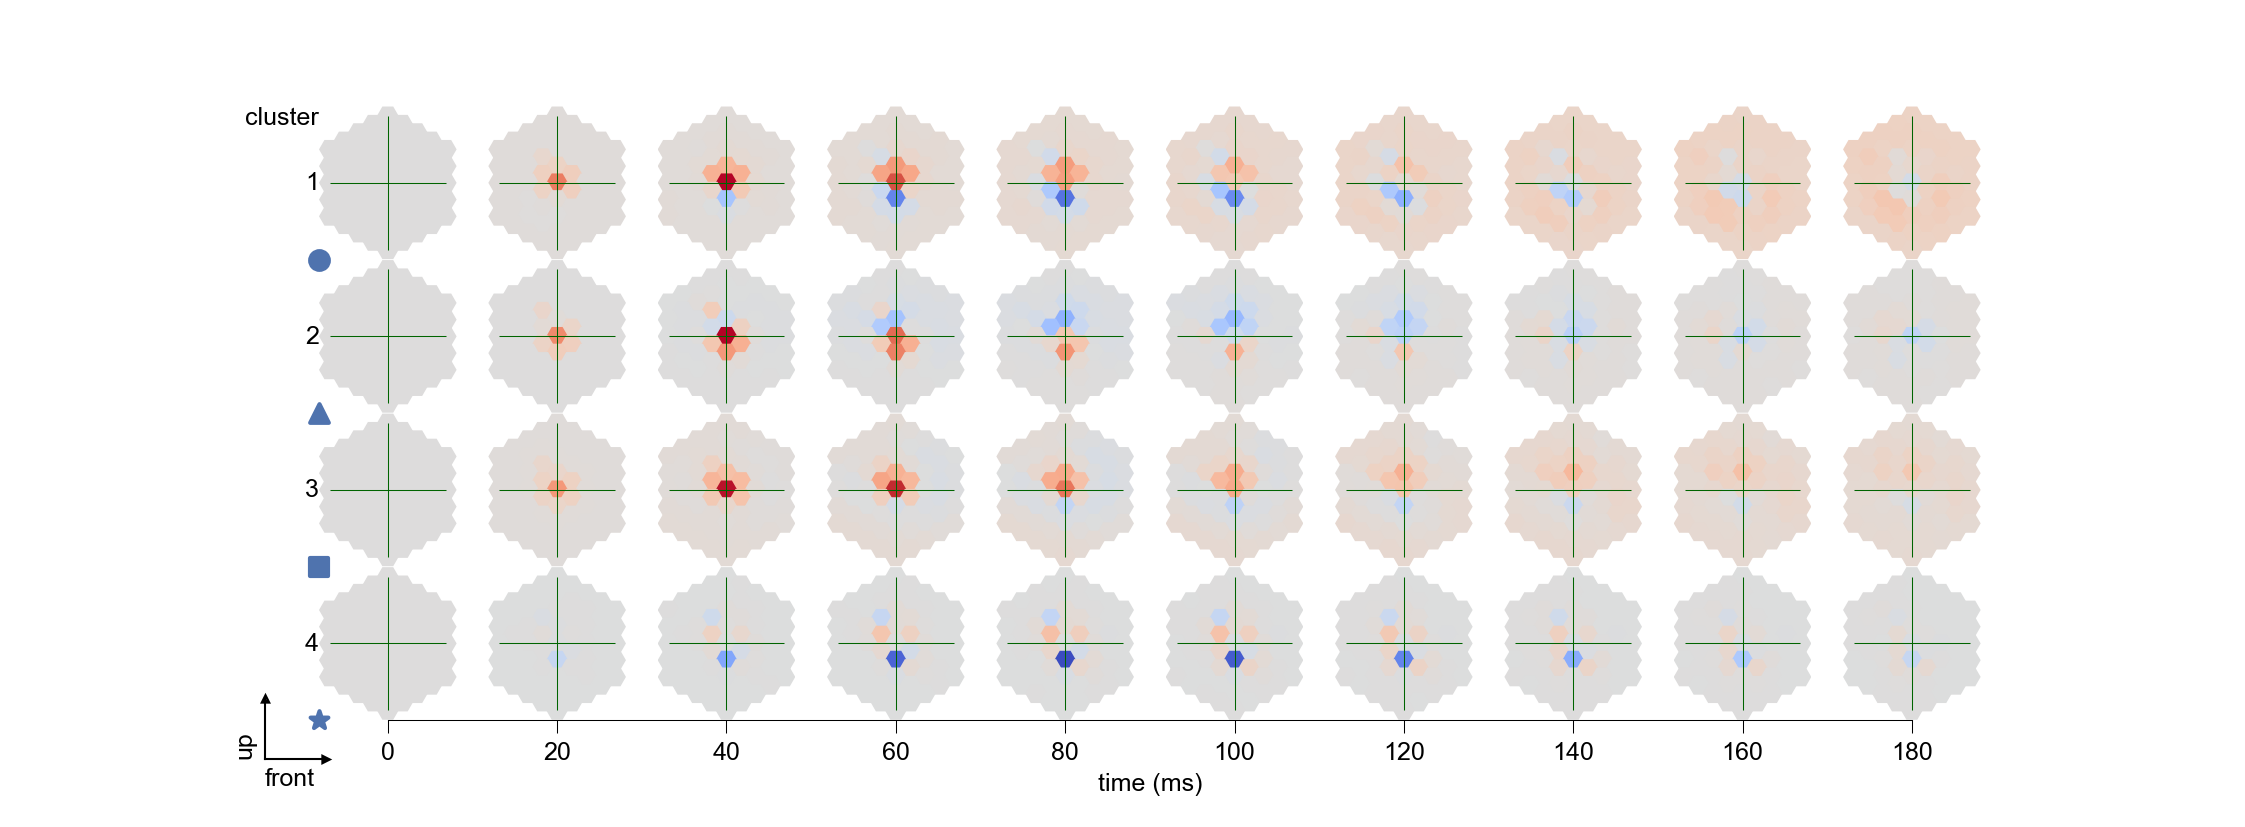

In [32]:
_ = si_impulse_responses(
    cell_type,
    ensemble,
    impulse_responses_subwrap,
    naturalistic_responses_subwrap=naturalistic_responses_subwrap,
    validation_subwrap=validation_subwrap,
    validation_loss_fn=validation_loss_fn,
    embedding_kwargs=embedding_kwargs,
    gm_kwargs=gm_kwargs,
    title="",
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
    fontsize=fontsize,
)

## Maximally excitatory stimuli

```json
{
  "caption": "\\textbf{Maximally excitatory stimuli.}",
  "label": "fig:si_nmei",
  "long_caption": "Each row presents the regularized naturalistic-stimulus from the Sintel dataset that maximizes the cell type's central column response at second zero in the task-optimal model of the respective cluster (rows).",
  "trusted": false
}
```

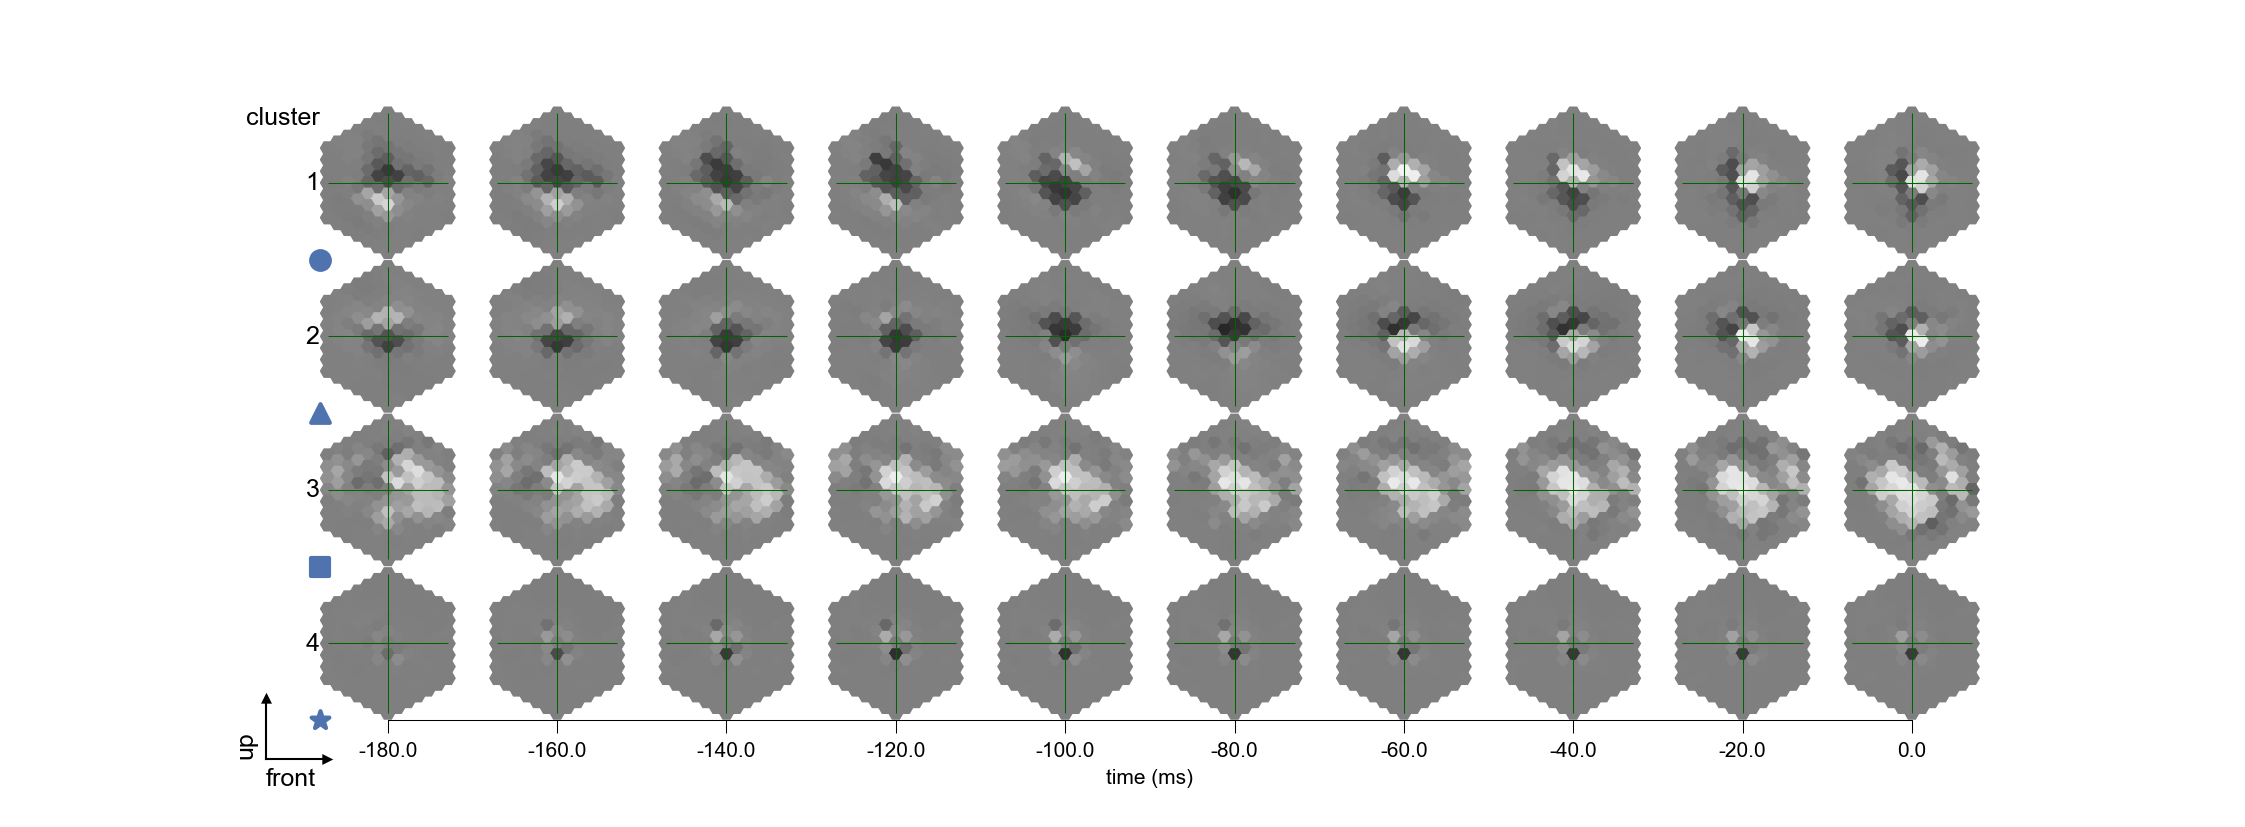

In [33]:
_ = si_rnmeis_v2(
    cell_type,
    ensemble,
    rnmeis_subwrap,
    save=False,
    naturalistic_responses_subwrap=naturalistic_responses_subwrap,
    validation_subwrap=validation_subwrap,
    validation_loss_fn=validation_loss_fn,
    embedding_kwargs=embedding_kwargs,
    gm_kwargs=gm_kwargs,
    title="",
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm,
    panel_width_cm=panel_width_cm,
    fontsize=fontsize,
)

## Task-constrained parameters

```json
{
  "caption": "\\textbf{Task-constrained parameters.}",
  "label": "fig:si_params",
  "long_caption": "Each column shows the parameters inferred within the respective cluster. First row: learned time constants of the cell type. Second row: resting potentials of the cell type. Third row: scaling factors for the convolutional filters. The blue scatter represents the parameters from the task-optimal model within the cluster.",
  "scrolled": false,
  "trusted": false
}
```

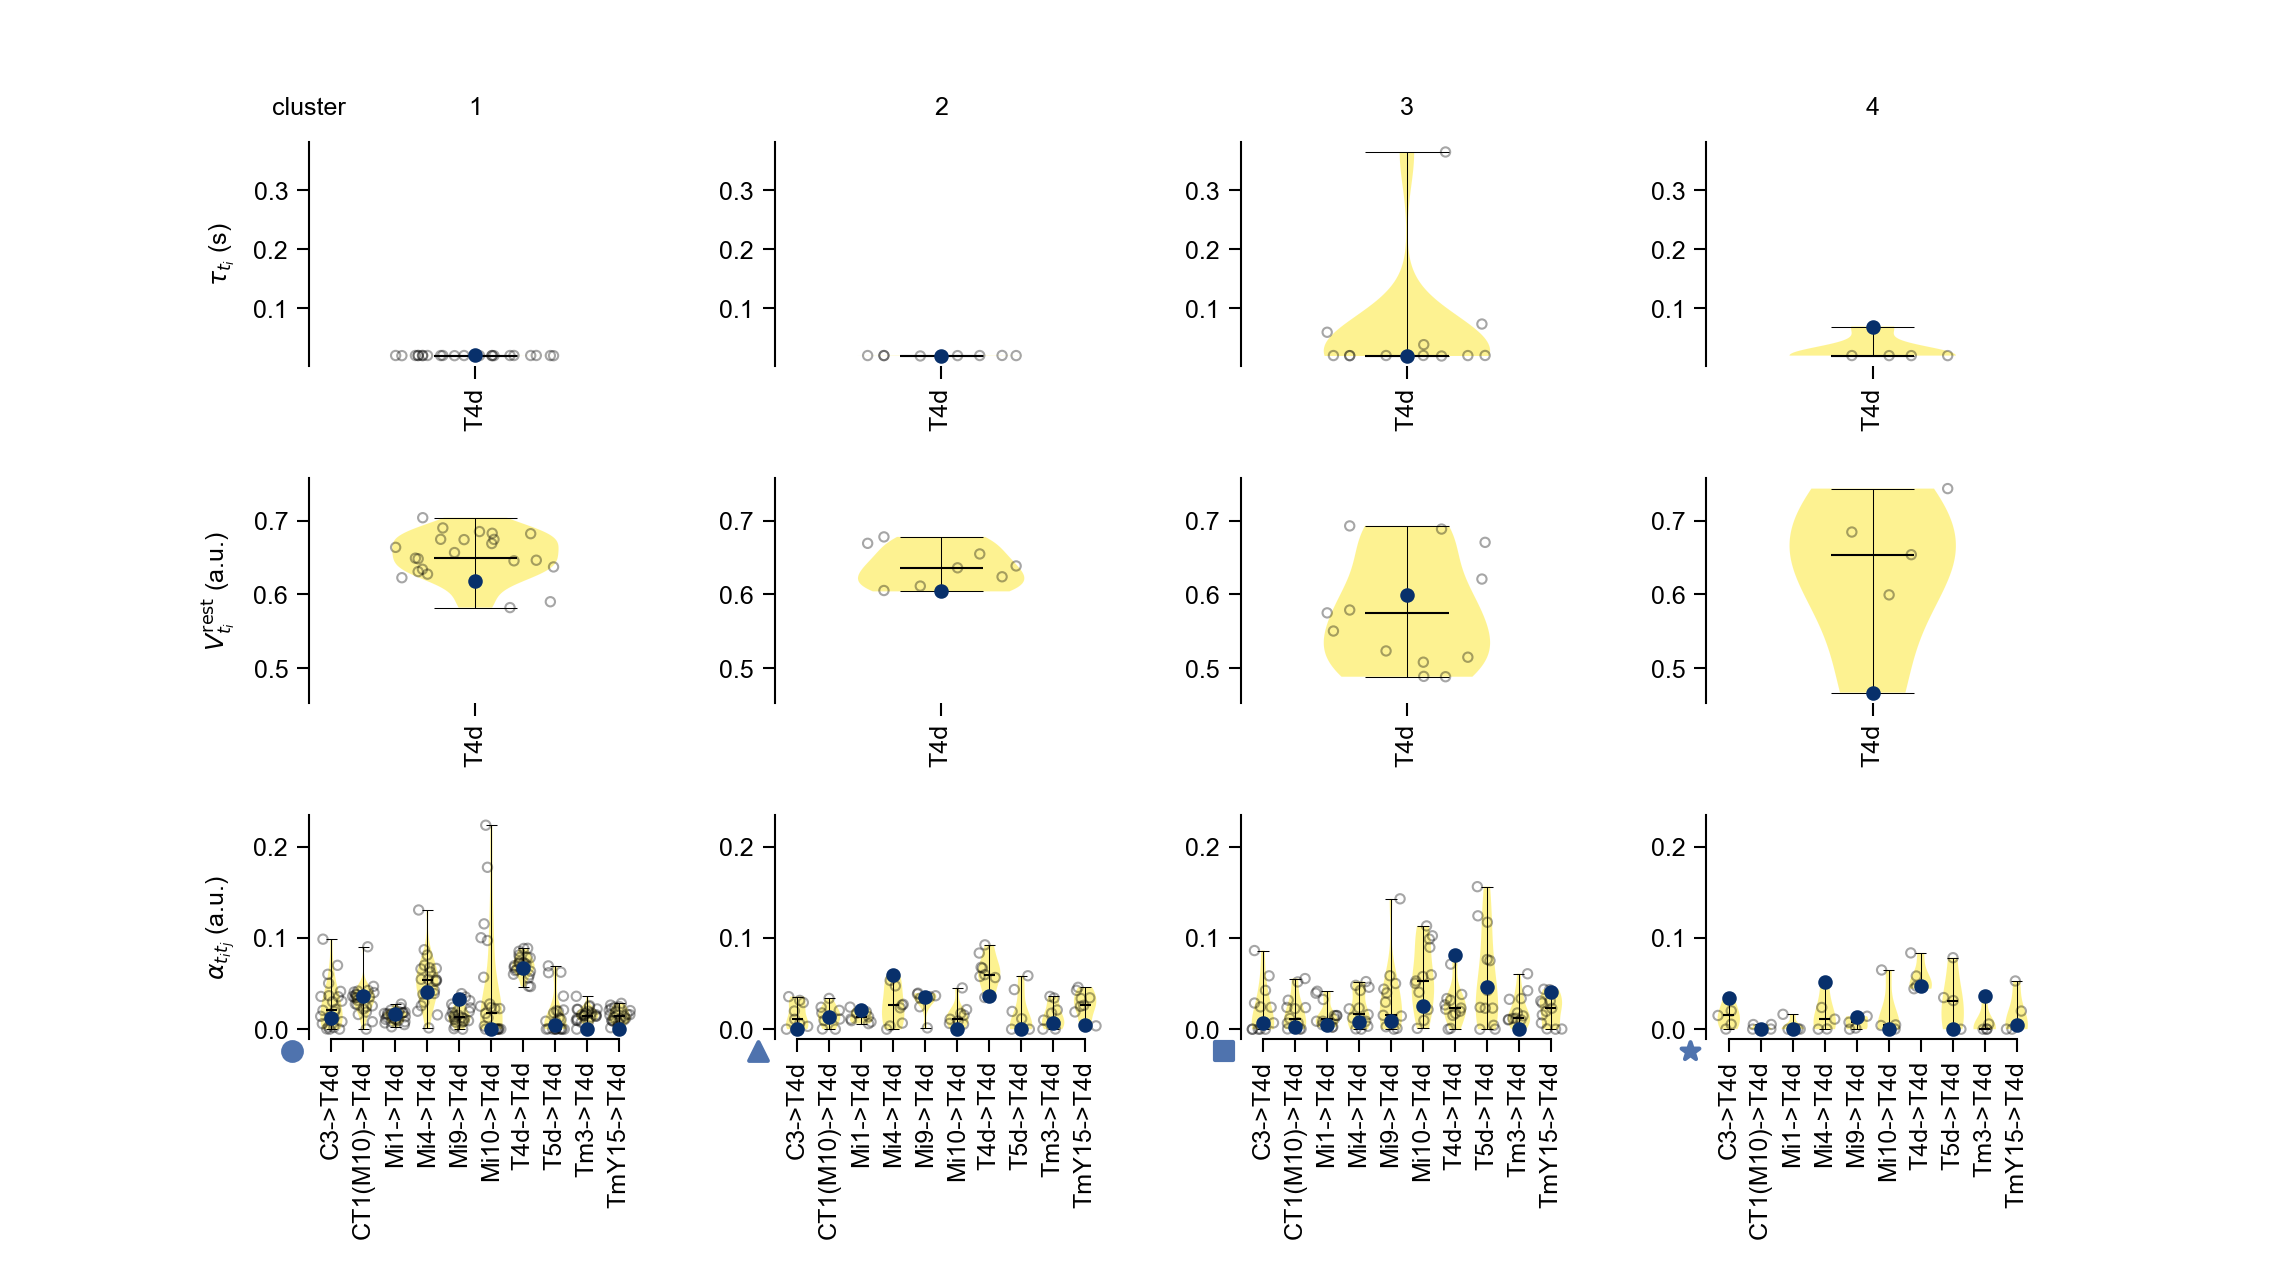

In [34]:
_ = si_parameters_horizontal(
    cell_type,
    ensemble,
    naturalistic_responses_subwrap=naturalistic_responses_subwrap,
    validation_subwrap=validation_subwrap,
    validation_loss_fn=validation_loss_fn,
    embedding_kwargs=embedding_kwargs,
    gm_kwargs=gm_kwargs,
    title="",
    max_figure_height_cm=max_figure_height_cm,
    panel_height_cm=panel_height_cm,
    max_figure_width_cm=max_figure_width_cm + 1,
    panel_width_cm=panel_width_cm + 1,
    fontsize=fontsize,
)